<a href="https://colab.research.google.com/github/SobolMaria/goit-ds-hw-08/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
base_path = '/content/drive/My Drive/Colab Notebooks/goit/module_8/data/'
categories = ['idle', 'running', 'stairs', 'walking']

In [14]:
all_data = []

for category in categories:
    folder_path = os.path.join(base_path, category)

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            df['category'] = category  # Додати колонку з категорією
            all_data.append(df)

# Об'єднати всі дані в один DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

In [18]:
df = combined_df
df

,accelerometer_X,accelerometer_Y,accelerometer_Z,category
0,0.397437,-0.019154,9.753978,idle
1,0.383072,0.009577,9.749189,idle
2,0.363919,0.023942,9.787497,idle
3,0.392649,-0.028730,9.725247,idle
4,0.426168,-0.043096,9.768343,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


In [19]:
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[features])

# Заміна вихідних даних нормалізованими даними
norm_data = df.copy()
norm_data[features] = normalized_data
norm_data

,accelerometer_X,accelerometer_Y,accelerometer_Z,category
0,-0.181575,-0.129669,1.105333,idle
1,-0.183284,-0.127366,1.104667,idle
2,-0.185563,-0.126214,1.109994,idle
3,-0.182145,-0.130437,1.101338,idle
4,-0.178157,-0.131589,1.107331,idle
...,...,...,...,...
193855,0.379029,-1.366884,-0.455385,walking
193856,0.529435,-1.069384,-1.394879,walking
193857,0.162535,-0.929271,-0.304241,walking
193858,-0.583227,-0.372659,-0.073862,walking


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df["category"], test_size=0.3, stratify=norm_data["category"],)

In [24]:
svm_m = SVC()
svm_m.fit(X_train, y_train)

SVC()

In [25]:
rand_f = RandomForestClassifier(n_estimators=100)
rand_f.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred_svm = svm_m.predict(X_test)
y_pred_randf = rand_f.predict(X_test)

print(f"SVM Accuracy: {svm_m.score(X_test, y_test):.6f}")
print(f"Random Forest Accuracy: {rand_f.score(X_test, y_test):.6f}")

SVM Accuracy: 0.893222
Random Forest Accuracy: 0.999553


In [33]:
print("\nClassification Report - SVM")
print(classification_report(y_test, y_pred_svm))


Classification Report - SVM
              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      9351
     running       0.93      0.90      0.92     30672
      stairs       1.00      0.00      0.00      1485
     walking       0.80      0.91      0.85     16650

    accuracy                           0.89     58158
   macro avg       0.92      0.70      0.69     58158
weighted avg       0.90      0.89      0.88     58158



In [34]:
print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_randf))


Classification Report - Random Forest
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      9351
     running       1.00      1.00      1.00     30672
      stairs       1.00      0.99      1.00      1485
     walking       1.00      1.00      1.00     16650

    accuracy                           1.00     58158
   macro avg       1.00      1.00      1.00     58158
weighted avg       1.00      1.00      1.00     58158



In [35]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_randf = confusion_matrix(y_test, y_pred_randf)

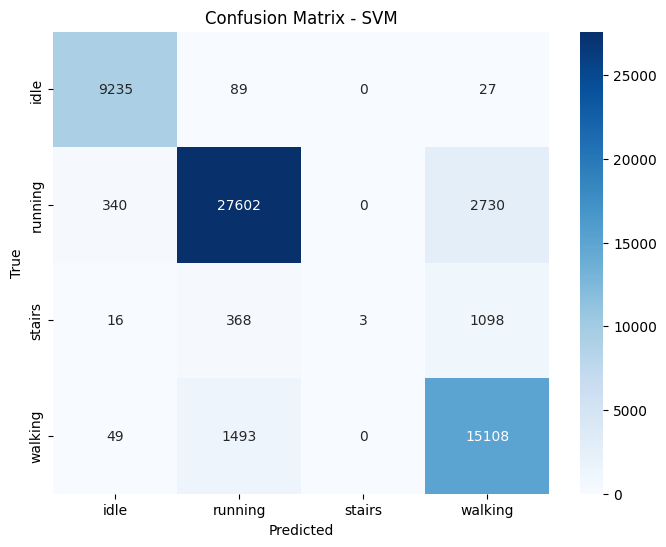

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

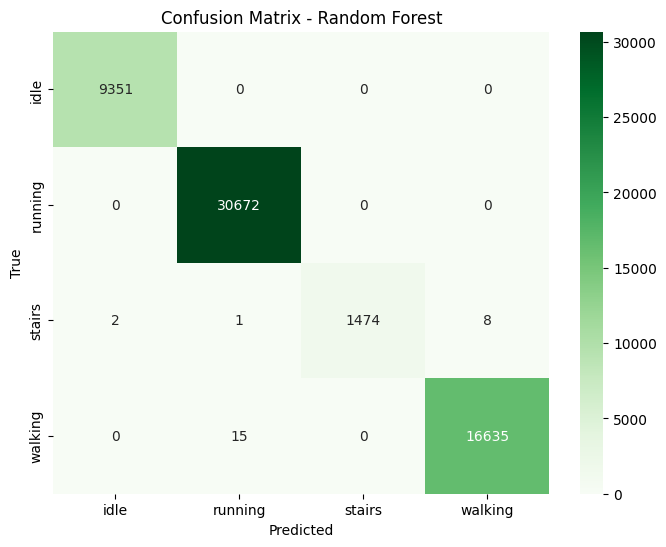

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_randf, annot=True, fmt='d', cmap='Greens', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Отже, як видно з результатів, в даному випадку метод Random forest спрацював краще ніж SVM

Метод SVM дуже погано розпізнає ходіння по сходам, в більшості випадків припускаючи неправильний варіант. Також досить часто неправильно припускає прогулянку замість бігу і навпаки. В той час як Random forest робить досить точні передбачення з мінімальними помилками